 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [24]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression

%matplotlib inline

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()

    x = x[:,1]
    return model.params[0], model.params[1]

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [25]:
# Reading whale returns
whale_df = pd.read_csv('data/whale_returns.csv')

In [26]:
# Count nulls
whale_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [27]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [28]:
# Reading algorithmic returns
algo_df = pd.read_csv('data/algo_returns.csv')

In [29]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [30]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [31]:
# Reading S&P TSX 60 Closing Prices
snp_df = pd.read_csv('data/sp_tsx_history.csv')


In [32]:
# Check Data Types
snp_df.dtypes

Date     object
Close    object
dtype: object

In [33]:
# Drop nulls
snp_df.dropna(inplace=True)

In [34]:
# Fix Data Types
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
snp_df['Date'] = pd.to_datetime(snp_df['Date'])

# Remove $ symbol from snp_df['Close']
snp_df['Close'] = snp_df['Close'].str.replace('$', '')
snp_df['Close'] = snp_df['Close'].str.replace(',', '')

# Convert all columns except Date to float
snp_df[snp_df.columns[1:]] = snp_df[snp_df.columns[1:]].astype(float)
algo_df[algo_df.columns[1:]] = algo_df[algo_df.columns[1:]].astype(float)
whale_df[whale_df.columns[1:]] = whale_df[whale_df.columns[1:]].astype(float)


/tmp/ipykernel_13099/1224098251.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  snp_df['Close'] = snp_df['Close'].str.replace('$', '')


In [35]:
# Calculate Daily Returns
# Add daily returns to snp_df from closing prices
snp_df['SNPTSX'] = snp_df['Close'].pct_change()
snp_df.dropna(inplace=True)

In [36]:
# Rename `Close` Column to be specific to this portfolio.
snp_df.rename(columns={'Close': 'SNPTSX Close'}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.merge(snp_df, whale_df, on='Date')
portfolio_df = pd.merge(portfolio_df, algo_df, on='Date')

In [38]:
# Reanme columns for utility
portfolio_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'Soros', 'PAULSON & CO.INC. ':'Paulson', 'TIGER GLOBAL MANAGEMENT LLC':'Tiger', 'BERKSHIRE HATHAWAY INC':'Berkshire'}, inplace=True)

# Drop SNPTSX Close Column
portfolio_df.drop(columns=['SNPTSX Close'], inplace=True)
portfolio_df.head()

,Date,SNPTSX,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2
0,2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
1,2015-03-04,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2,2015-03-05,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
3,2015-03-06,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
4,2015-03-09,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

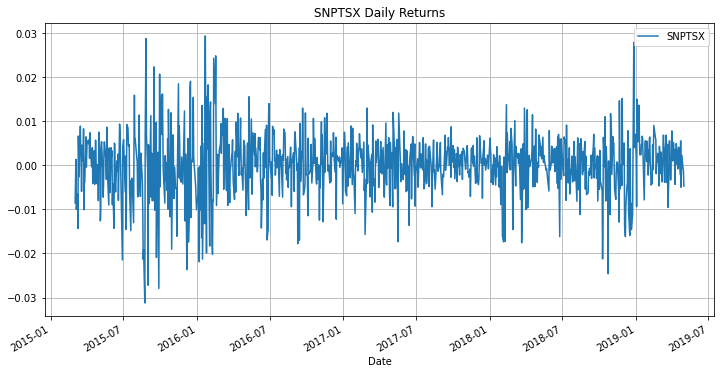

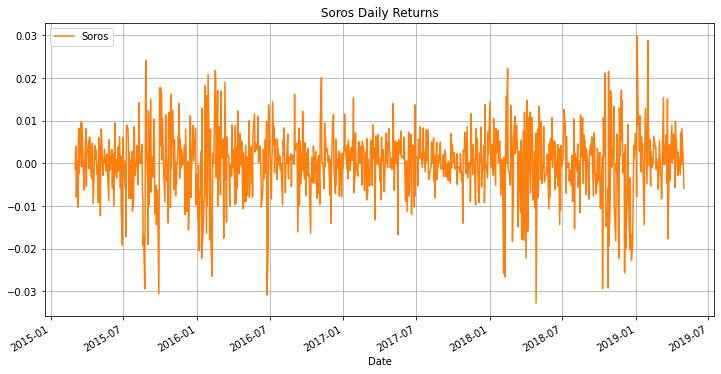

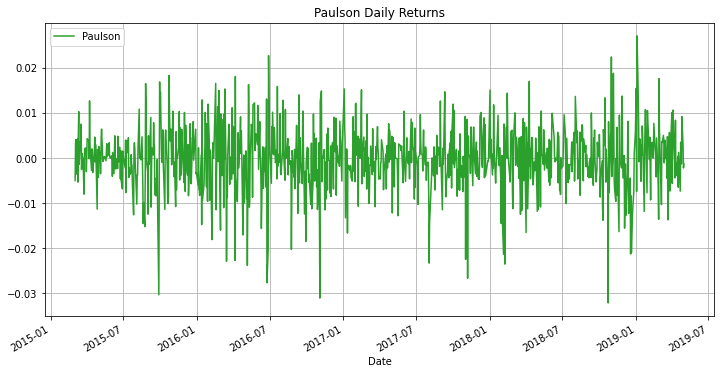

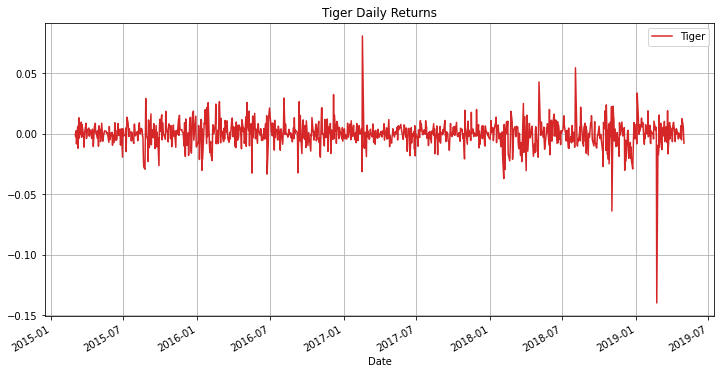

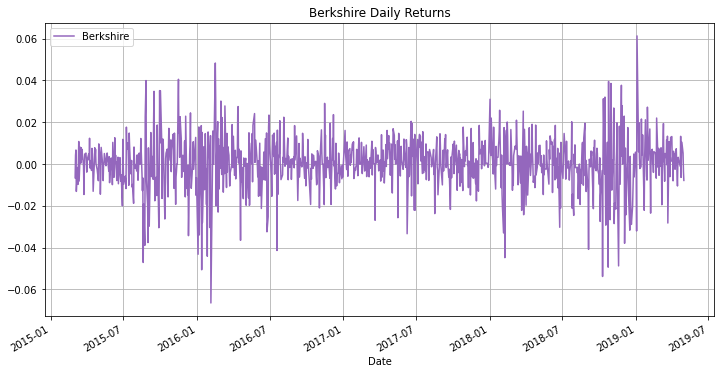

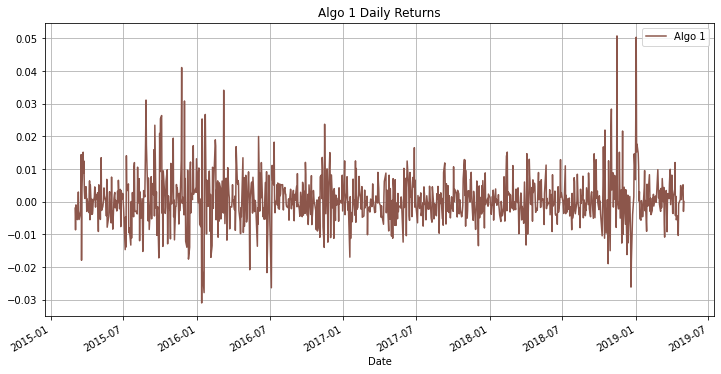

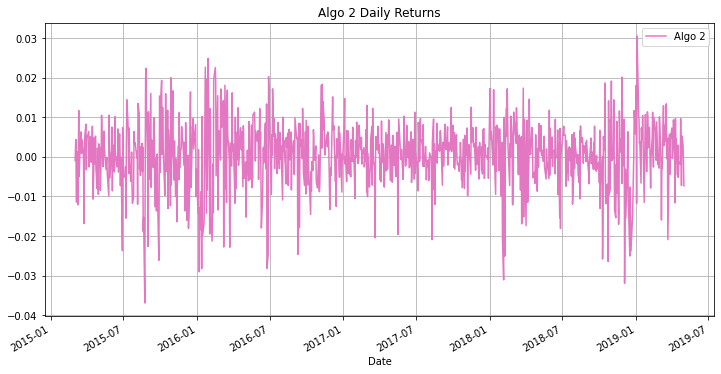

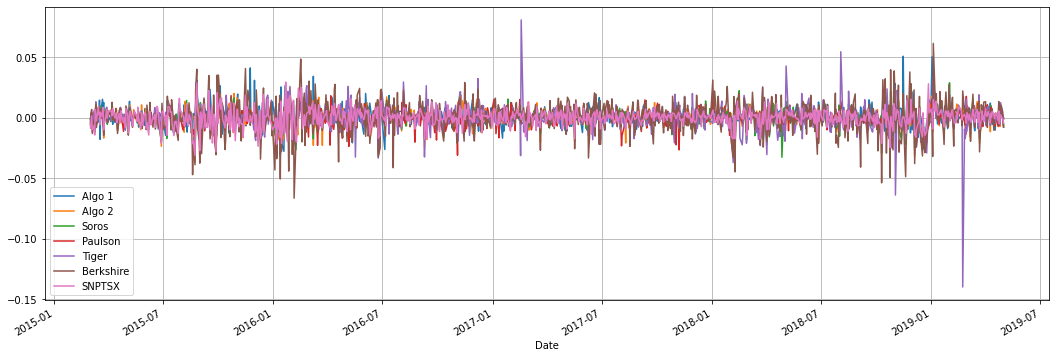

In [39]:
# Plot daily returns of all portfolios
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#1688f0']

# Individual plots
for col in portfolio_df.columns[1:]:
    portfolio_df.plot(x='Date', y=col, figsize=(12, 6), title=f'{col} Daily Returns', grid=True, color=colors[portfolio_df.columns[1:].get_loc(col)], legend=True)

# Combined plot
portfolio_df.plot(x='Date', y=['Algo 1', 'Algo 2', 'Soros', 'Paulson', 'Tiger', 'Berkshire', 'SNPTSX'], figsize=(18,6), grid=True, color=colors, legend=True)


#### Calculate and Plot cumulative returns.

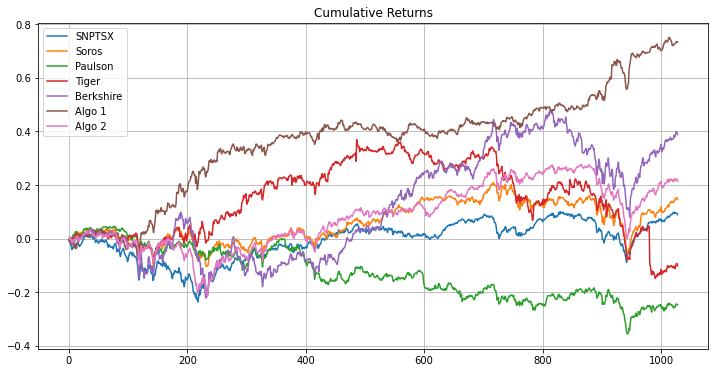

In [40]:
# Calculate cumulative returns of all portfolios and plot
for col in portfolio_df.columns[1:]:
    portfolio_df[col].cumsum().plot(x='Date', figsize=(12, 6), title='Cumulative Returns', grid=True, color=colors[portfolio_df.columns[1:].get_loc(col)], legend=True)

Algo 1, Algo 2, Soros and Berkshire all seem to outperform the S&P returns.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

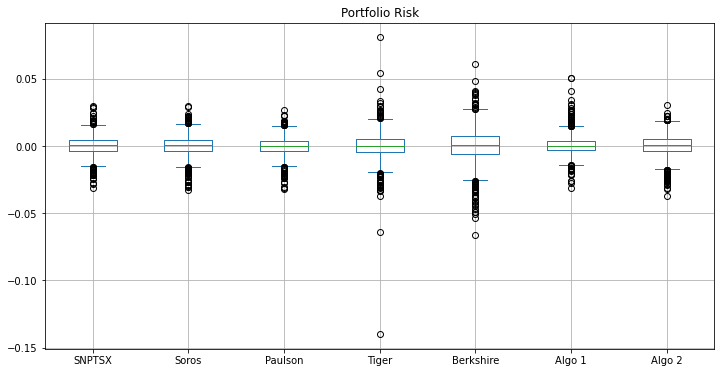

In [41]:
# Box plot to visually show risk
portfolio_df.plot.box(figsize=(12,6), grid=True, title='Portfolio Risk')

### Calculate Standard Deviations

In [42]:
# Calculate the daily standard deviations of all portfolios
for col in portfolio_df.columns[1:]:
    print(f'Standard Deviation of {col} => {round(portfolio_df[col].std(), 6)}')

Standard Deviation of SNPTSX => 0.007034
Standard Deviation of Soros => 0.007828
Standard Deviation of Paulson => 0.006982
Standard Deviation of Tiger => 0.010883
Standard Deviation of Berkshire => 0.012826
Standard Deviation of Algo 1 => 0.007589
Standard Deviation of Algo 2 => 0.008326


### Determine which portfolios are riskier than the S&P TSX 60

In [43]:
# Calculate  the daily standard deviation of S&P TSX 60
snp_std_dev = portfolio_df['SNPTSX'].std()
# Determine which portfolios are riskier than the S&P TSX 60
for col in portfolio_df.columns[2:]:
    if portfolio_df[col].std() > snp_std_dev:
        print(f'{col} is riskier than the S&P')

Soros is riskier than the S&P
Tiger is riskier than the S&P
Berkshire is riskier than the S&P
Algo 1 is riskier than the S&P
Algo 2 is riskier than the S&P


### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
for col in portfolio_df.columns[1:]:
    annualized_std_dev = portfolio_df[col].std() * np.sqrt(252)
    print(f'Annualized Standard Deviation of {col} => {round(annualized_std_dev, 6)}')

Annualized Standard Deviation of SNPTSX => 0.111664
Annualized Standard Deviation of Soros => 0.124259
Annualized Standard Deviation of Paulson => 0.110841
Annualized Standard Deviation of Tiger => 0.172759
Annualized Standard Deviation of Berkshire => 0.203599
Annualized Standard Deviation of Algo 1 => 0.12047
Annualized Standard Deviation of Algo 2 => 0.132177


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}>

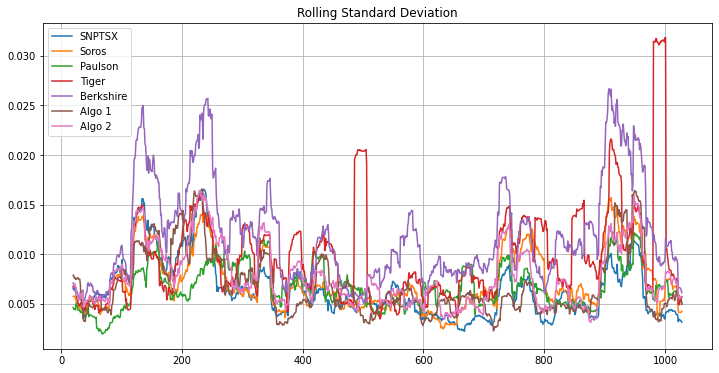

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = portfolio_df.iloc[:, 1:].rolling(21).std().dropna()
# Plot the rolling standard deviation
rolling_std_dev.plot(figsize=(12,6), title='Rolling Standard Deviation', grid=True)

### Calculate and plot the correlation

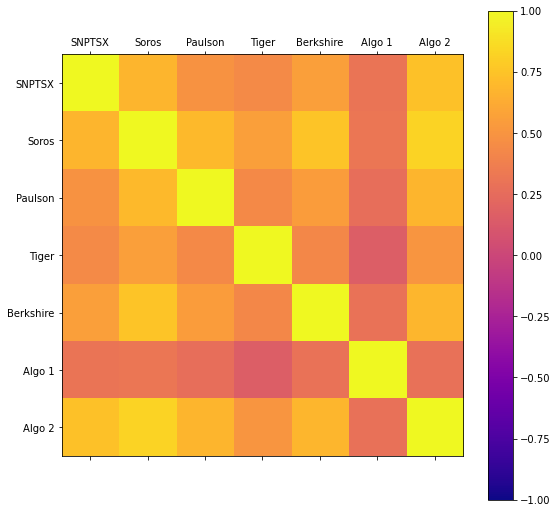

In [46]:
# Calculate the correlation
correlation = portfolio_df.iloc[:, 1:].corr()
# Display de correlation matrix
plt.rcParams['figure.figsize'] = (9, 9)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, cmap='plasma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(portfolio_df.columns[1:]), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(portfolio_df.columns[1:])
ax.set_yticklabels(portfolio_df.columns[1:])
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

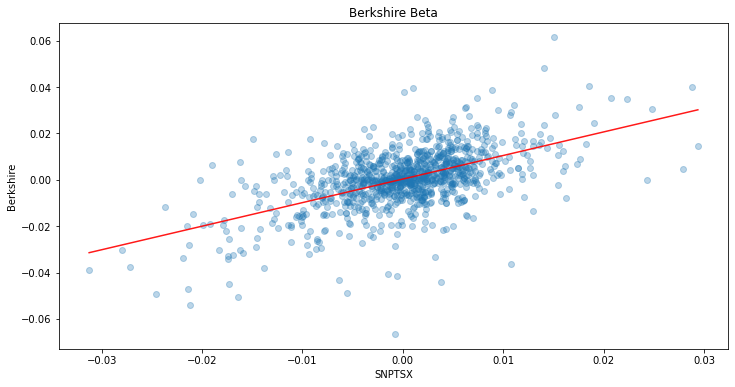

In [47]:
# Calculate covariance of a single portfolio
berkshire_cov = portfolio_df['Berkshire'].cov(portfolio_df['SNPTSX'])
# Calculate variance of S&P TSX
snp_var = portfolio_df['SNPTSX'].var()
# Computing beta
berkshire_beta = berkshire_cov / snp_var
beta_portfolio = portfolio_df.copy()
beta_portfolio['Berkshire Beta'] = berkshire_beta

# Plot beta trend
X = beta_portfolio['SNPTSX'].values
Y = beta_portfolio['Berkshire'].values
alpha, beta = linreg(X, Y)
X2 = np.linspace(X.min(), X.max(), 100)
Y2 = alpha + beta * X2

plt.figure(figsize=(12,6))
plt.scatter(X, Y, alpha=0.3)
plt.plot(X2, Y2, 'r', alpha=0.9)
plt.xlabel('SNPTSX')
plt.ylabel('Berkshire')
plt.title('Berkshire Beta')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Rolling EWM'}>

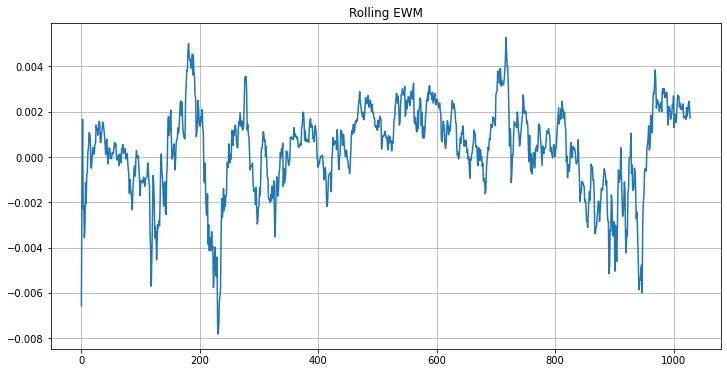

In [48]:
# Use `ewm` to calculate the rolling window
rolling_ewm = portfolio_df['Berkshire'].ewm(21).mean().dropna()
# Plot the rolling beta
rolling_ewm.plot(figsize=(12,6), title='Rolling EWM', grid=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
sharpe_ratios = []
for col in portfolio_df.columns[1:]:
    annualized_sharpe_ratio = (portfolio_df[col].mean() - 0.01) / portfolio_df[col].std() * np.sqrt(252)
    sharpe_ratios.append(-1 * annualized_sharpe_ratio)
    print(f'Annualized Sharpe Ratio of {col} => {round(annualized_sharpe_ratio, 6)}')

Annualized Sharpe Ratio of SNPTSX => -22.372163
Annualized Sharpe Ratio of Soros => -19.993525
Annualized Sharpe Ratio of Paulson => -23.282877
Annualized Sharpe Ratio of Tiger => -14.731261
Annualized Sharpe Ratio of Berkshire => -11.910241
Annualized Sharpe Ratio of Algo 1 => -19.426595
Annualized Sharpe Ratio of Algo 2 => -18.668546


<BarContainer object of 7 artists>

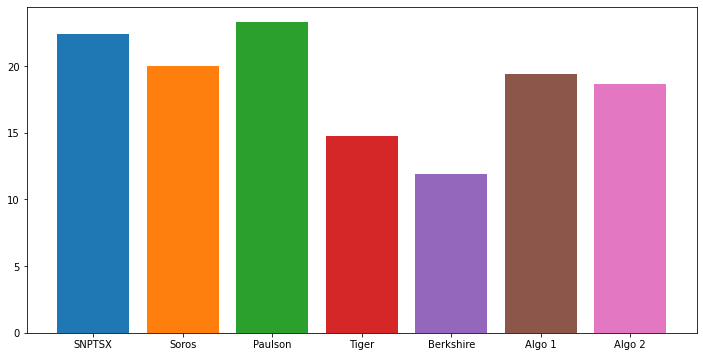

In [50]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12,6))
plt.bar(portfolio_df.columns[1:], sharpe_ratios, color=colors)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 and Algo 2 outperform Tiger and Berkshire and are almost on par with Soros.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [51]:
# Reading data from 1st stock
google_df = pd.read_csv('data/goog.csv')

In [52]:
# Reading data from 2nd stock
apple_df = pd.read_csv('data/aapl.csv')

In [53]:
# Reading data from 3rd stock
microsoft_df = pd.read_csv('data/msft.csv')

In [54]:
# Change date to datetime
google_df['Date'] = pd.to_datetime(google_df['Date'])
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])

# Calculate daily returns
google_df['GOOG'] = google_df['Close'].pct_change()
apple_df['AAPL'] = apple_df['Close'].pct_change()
microsoft_df['MSFT'] = microsoft_df['Close'].pct_change()

# Reorganize portfolio data by having a column per symbol
google_df = google_df.rename(columns={'Close': 'GOOG Close'})
apple_df = apple_df.rename(columns={'Close': 'AAPL Close'})
microsoft_df = microsoft_df.rename(columns={'Close': 'MSFT Close'})

# Combine all stocks in a single DataFrame
custom_df = pd.merge(google_df, apple_df, on='Date')
custom_df = pd.merge(custom_df, microsoft_df, on='Date')

# Drop NA
custom_df.dropna(inplace=True)


In [55]:
# Display sample data
custom_df.head()

,Date,GOOG Close,GOOG,AAPL Close,AAPL,MSFT Close,MSFT
1,2012-02-10,378.49,-0.006301,23.62,0.002972,29.66,0.005765
2,2012-03-10,381.25,0.007292,23.98,0.015241,29.86,0.006743
3,2012-04-10,384.02,0.007266,23.81,-0.007089,30.03,0.005693
4,2012-05-10,383.82,-0.000521,23.31,-0.021000,29.85,-0.005994
5,2012-08-10,378.92,-0.012766,22.79,-0.022308,29.78,-0.002345


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [56]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_df['Portfolio Return'] = weights[0] * custom_df['GOOG Close'] + weights[1] * custom_df['AAPL Close'] + weights[2] * custom_df['MSFT Close']
custom_df['Custom'] = custom_df['Portfolio Return'].pct_change()

# Create a new df with only Date and Custom column
my_portfolio = custom_df[['Date', 'Custom']].copy()
my_portfolio.dropna(inplace=True)

# Display sample data
my_portfolio.head()

,Date,Custom
2,2012-03-10,0.007689
3,2012-04-10,0.006366
4,2012-05-10,-0.002010
5,2012-08-10,-0.012564
6,2012-09-10,-0.017289


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [57]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_df = pd.merge(portfolio_df, my_portfolio, on='Date')

<AxesSubplot:title={'center':'Custom Portfolio'}>

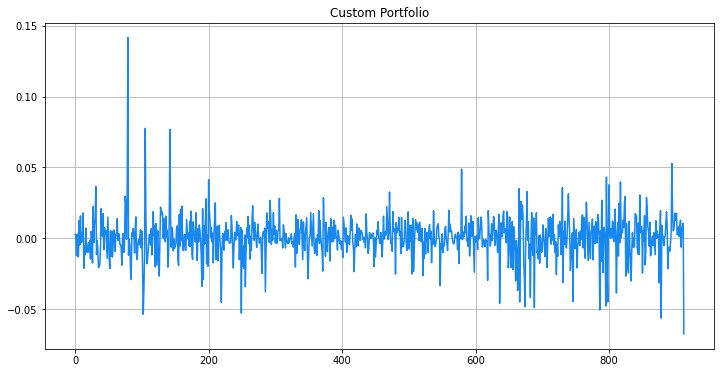

In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df.dropna(inplace=True)

# Plot the custom portfolio
portfolio_df['Custom'].plot(figsize=(12,6), title='Custom Portfolio', grid=True, color=colors[-1])

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [59]:
# Calculate the annualized `std`
my_annualized_std = portfolio_df['Custom'].std() * np.sqrt(252)
print(f'Annualized standard deviation of the custom portfolio => {round(my_annualized_std, 6)}')

Annualized standard deviation of the custom portfolio => 0.235503


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'My Rolling Standard Deviation'}>

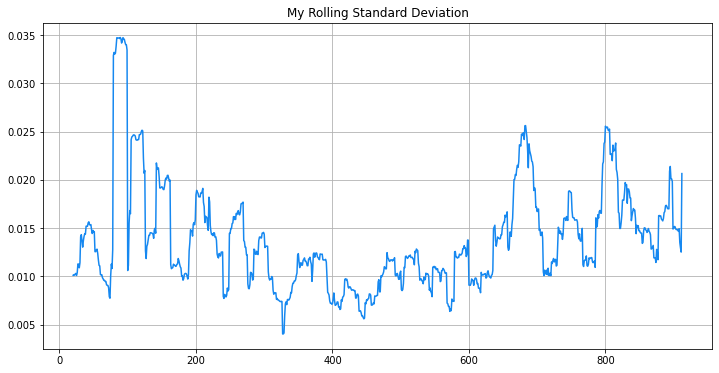

In [60]:
# Calculate rolling standard deviation
my_rolling_std = portfolio_df['Custom'].rolling(21).std().dropna()
# Plot rolling standard deviation
my_rolling_std.plot(figsize=(12,6), title='My Rolling Standard Deviation', grid=True, color=colors[-1])

### Calculate and plot the correlation

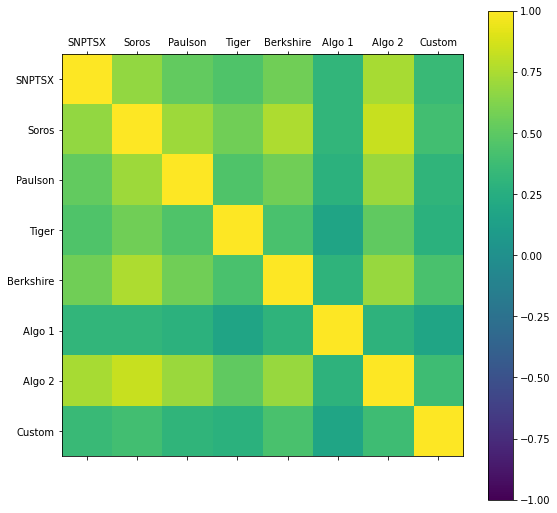

In [61]:
# Calculate and plot the correlation
# Calculate the correlation
correlation = portfolio_df.iloc[:, 1:].corr()
# Display de correlation matrix
plt.rcParams['figure.figsize'] = (9, 9)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(portfolio_df.columns[1:]), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(portfolio_df.columns[1:])
ax.set_yticklabels(portfolio_df.columns[1:])
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

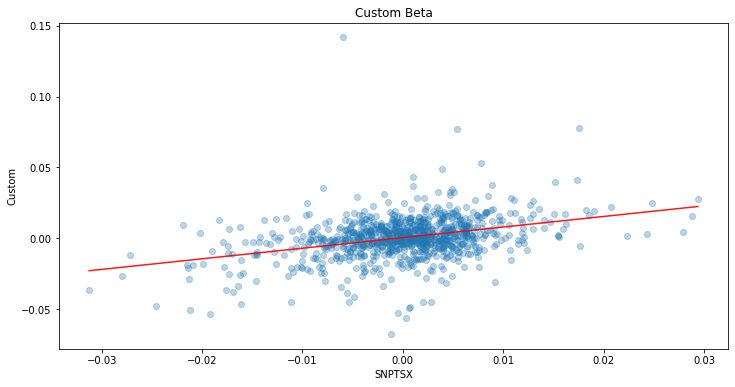

In [62]:
# Calculate and plot Beta
X = portfolio_df['SNPTSX'].values
Y = portfolio_df['Custom'].values
alpha, beta = linreg(X, Y)
X2 = np.linspace(X.min(), X.max(), 100)
Y2 = alpha + beta * X2

plt.figure(figsize=(12,6))
plt.scatter(X, Y, alpha=0.3)
plt.plot(X2, Y2, 'r', alpha=0.9)
plt.xlabel('SNPTSX')
plt.ylabel('Custom')
plt.title('Custom Beta')
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [63]:
# Calculate Annualized Sharpe Ratios
custom_sharpe_ratio = (portfolio_df['Custom'].mean() - 0.01) / portfolio_df['Custom'].std() * np.sqrt(252)
sharpe_ratios.append(-1 * custom_sharpe_ratio)

<BarContainer object of 8 artists>

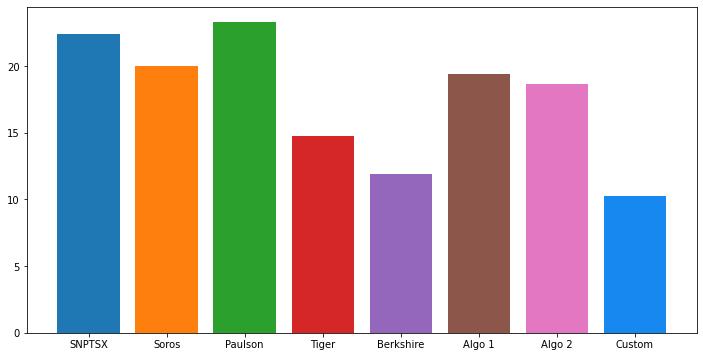

In [64]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12,6))
plt.bar(portfolio_df.columns[1:], sharpe_ratios, color=colors)

### How does your portfolio do?

My Portfolio which is a combination of three stocks, with a weight of 1/3 each: GOOG, AAPL, and MSFT.
It is the worst performing portfolio.